In [2]:
!pip install statsmodels

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [2]:
df = pd.read_csv('./csv/apple_x_socio.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 41 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Unnamed: 0                                     322 non-null    int64  
 1   model                                          322 non-null    object 
 2   country_code                                   322 non-null    object 
 3   country                                        322 non-null    object 
 4   region                                         322 non-null    object 
 5   income group                                   322 non-null    object 
 6   scraped_date                                   322 non-null    object 
 7   model_en                                       322 non-null    object 
 8   price_local_currency                           322 non-null    float64
 9   Currency CodeA                                 322 non

# Lineare Regression

In [4]:
y = df["Prison population per 100.000"]
x = df["USD_Normalized_MEAN"]

In [5]:
# x = sm.add_constant(x1)
lm = sm.OLS(y,x).fit()

In [6]:
lm.predict(x)

0      133.298801
1      133.298801
2      133.298801
3      133.298801
4      133.298801
          ...    
317    120.762410
318    120.762410
319    120.762410
320    120.762410
321    120.762410
Length: 322, dtype: float64

In [7]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      OLS Regression Results                                      
==================================================================================================
Dep. Variable:     Prison population per 100.000   R-squared (uncentered):                   0.507
Model:                                       OLS   Adj. R-squared (uncentered):              0.505
Method:                            Least Squares   F-statistic:                              330.1
Date:                           Tue, 05 Apr 2022   Prob (F-statistic):                    3.12e-51
Time:                                   12:39:21   Log-Likelihood:                         -2079.8
No. Observations:                            322   AIC:                                      4162.
Df Residuals:                                321   BIC:                                      4165.
Df Model:                                      1                                                  
Covariance Type:                       nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
USD_Normalized_MEAN     0.2958      0.016     18.170      0.000       0.264       0.328
==============================================================================
Omnibus:                      171.607   Durbin-Watson:                   0.054
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              684.346
Skew:                           2.437   Prob(JB):                    2.49e-149
Kurtosis:                       8.221   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

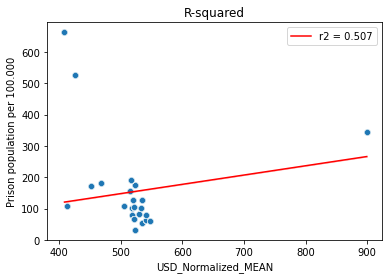

In [8]:
# plotting the data points
sns.scatterplot(x=df['USD_Normalized_MEAN'], y=y)
#plotting the line
sns.lineplot(x=df['USD_Normalized_MEAN'],y=lm.predict(x), color='red', label="r2 = 0.507")
#axes
plt.xlim(380)
plt.ylim(0)
plt.title("R-squared")
# plt.legend("r2", loc="lower right")
plt.show()

# Logistische Regression

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [68]:
df['USD_Normalized_MEAN'] = df['USD_Normalized_MEAN'].astype(int)
df['GINI'] = df['GINI'].astype(int)

X = df["USD_Normalized_MEAN"].to_numpy().reshape(-1, 1)
y = df["GINI"].to_numpy()

train_x, test_x, train_y, test_y = train_test_split(X, y)

clf = LogisticRegression(max_iter=300)
clf.fit(train_x, train_y)
# Klassifikationsgüte berechnen
print("Genauigkeit: %f" % accuracy_score(test_y, clf.predict(test_x)))

Genauigkeit: 0.358025


# AdaBoostRegressor

In [69]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_absolute_error

for rate in [1.0, 0.5, 0.1, 0.01, 0.001]:
    adaboostregressor = AdaBoostRegressor(random_state=1, learning_rate=rate)
    adaboostregressor.fit(train_x, train_y)
    pred = adaboostregressor.predict(test_x)
    print(f"Learning Rate: {rate}","MAE:", mean_absolute_error(test_y, pred))

Learning Rate: 1.0 MAE: 2.4446476893188485
Learning Rate: 0.5 MAE: 2.3028891923157158
Learning Rate: 0.1 MAE: 2.1694469418799436
Learning Rate: 0.01 MAE: 2.2257617916680448
Learning Rate: 0.001 MAE: 2.2334622297904554


# BaggingRegressor

In [71]:
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_absolute_error


BaggingRegressor = BaggingRegressor(random_state=1)
BaggingRegressor.fit(train_x, train_y)
pred = BaggingRegressor.predict(test_x)
print("MAE:", mean_absolute_error(test_y, pred))

MAE: 0.5927921154138606


# DecisionTree

In [72]:
from sklearn.tree import DecisionTreeRegressor

In [73]:
model = DecisionTreeRegressor()
model.fit(train_x, train_y)

predictions = model.predict(test_x)

print("MAE: ", mean_absolute_error(test_y, predictions))

MAE:  0.5898883009994121


# Korrelation

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 41 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Unnamed: 0                                     322 non-null    int64  
 1   model                                          322 non-null    object 
 2   country_code                                   322 non-null    object 
 3   country                                        322 non-null    object 
 4   region                                         322 non-null    object 
 5   income group                                   322 non-null    object 
 6   scraped_date                                   322 non-null    object 
 7   model_en                                       322 non-null    object 
 8   price_local_currency                           322 non-null    float64
 9   Currency CodeA                                 322 non

## Highest Correlations

In [18]:
df["USD_Normalized_MEAN"].corr(df["Homocide rate per 100.000"])

0.5565284041103994

In [19]:
df["USD_Normalized_MEAN"].corr(df["GINI"])

0.3954276971054509

In [20]:
df["USD_Normalized_MEAN"].corr(df["Income Shares of top 1%"])

0.4638561934088292

In [21]:
df["USD_Normalized_MEAN"].corr(df["Inequality in income in %"])

0.3952797882164825

## Lowest Correlation

In [22]:
df["USD_Normalized_MEAN"].corr(df["Prison population per 100.000"])

-0.08689813969842011

# Korrelationsmatrix